In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('listings_clustered.csv')
df.head()

,id,listing_url,picture_url,name,description,property_type,room_type,accommodates,number_of_reviews,bedrooms,beds,price,review_scores_rating,city,latitude,longitude,bathrooms,cluster
0,52438122,https://www.airbnb.com/rooms/52438122,https://a0.muscache.com/pictures/miso/Hosting-...,Stunning New Cottage minutes to downtown Ashev...,Come relax in this brand new cottage with tast...,Entire cottage,Entire home/apt,4,63,2.0,2.0,225.0,4.98,Asheville,35.56967,-82.63193,1.5,0
1,22119778,https://www.airbnb.com/rooms/22119778,https://a0.muscache.com/pictures/bac6ce5d-d2ff...,Large king suite with private balcony and soak...,Whether you're looking for a romantic Ashevill...,Private room in bed and breakfast,Private room,3,1,2.0,2.0,306.0,5.00,Asheville,35.60284,-82.56727,1.0,0
2,47812966,https://www.airbnb.com/rooms/47812966,https://a0.muscache.com/pictures/324713f3-ea1c...,Blue Ridge Magic: Artist's Hideaway (Brand New),New listing: Blue Ridge Magic named for our pa...,Entire rental unit,Entire home/apt,4,25,1.0,2.0,108.0,5.00,Asheville,35.58475,-82.57182,1.0,0
3,46284932,https://www.airbnb.com/rooms/46284932,https://a0.muscache.com/pictures/miso/Hosting-...,Simple and Cozy Bedroom in Central Area,Looking for a simple bedroom and bathroom to r...,Private room in bungalow,Private room,2,3,1.0,1.0,70.0,5.00,Asheville,35.57870,-82.61582,1.0,0
4,48366092,https://www.airbnb.com/rooms/48366092,https://a0.muscache.com/pictures/prohost-api/H...,"Hot tub, Fire pit, 5 miles to downtown Asheville","Beautiful 2 bedroom oasis. Custom built, fully...",Entire cottage,Entire home/apt,4,143,2.0,2.0,114.0,4.92,Asheville,35.55106,-82.51424,1.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923 entries, 0 to 28922
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28923 non-null  int64  
 1   listing_url           28923 non-null  object 
 2   picture_url           28923 non-null  object 
 3   name                  28923 non-null  object 
 4   description           28923 non-null  object 
 5   property_type         28923 non-null  object 
 6   room_type             28923 non-null  object 
 7   accommodates          28923 non-null  int64  
 8   number_of_reviews     28923 non-null  int64  
 9   bedrooms              28923 non-null  float64
 10  beds                  28923 non-null  float64
 11  price                 28923 non-null  float64
 12  review_scores_rating  28923 non-null  float64
 13  city                  28923 non-null  object 
 14  latitude              28923 non-null  float64
 15  longitude          

# Average price by cluster

In [25]:
mean_data = df.groupby('cluster')['price'].mean().reset_index()
mean_data['cluster'] = mean_data['cluster'].astype(int) 
mean_data = mean_data.round(0).astype(int)
mean_data

,cluster,price
0,0,170
1,1,497


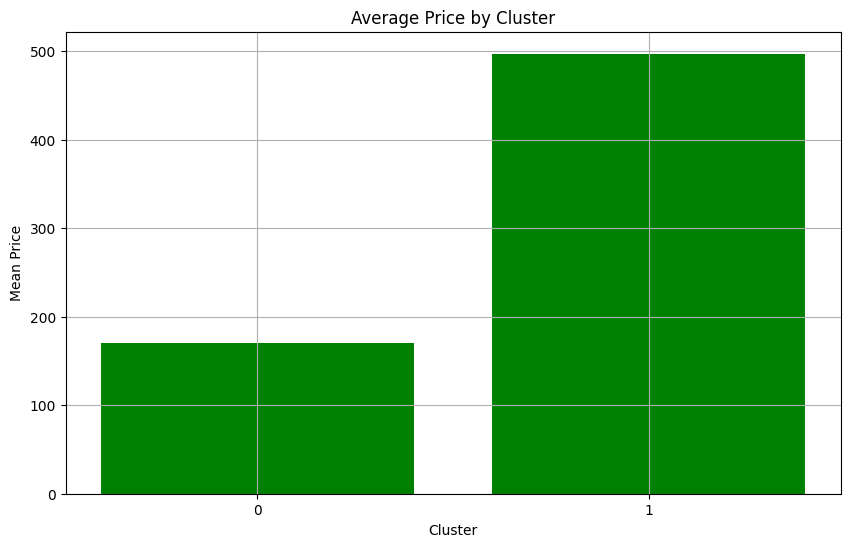

In [26]:
# Assuming mean_data is your DataFrame containing the mean prices for each cluster
clusters = mean_data['cluster']
mean_prices = mean_data['price']

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(clusters, mean_prices, color='green')

# Add labels and title
plt.title('Average Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Price')
plt.xticks(clusters)
plt.grid(True)
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 1 memiliki harga yang jauh lebih tinggi dibandingkan cluster 0

Sehingga cluster 1 dapat digolongkan ke cluster mewah dan cluster 0 merupakan cluster ekonomis

# Average highest price by top 5 city

<Figure size 1200x800 with 0 Axes>

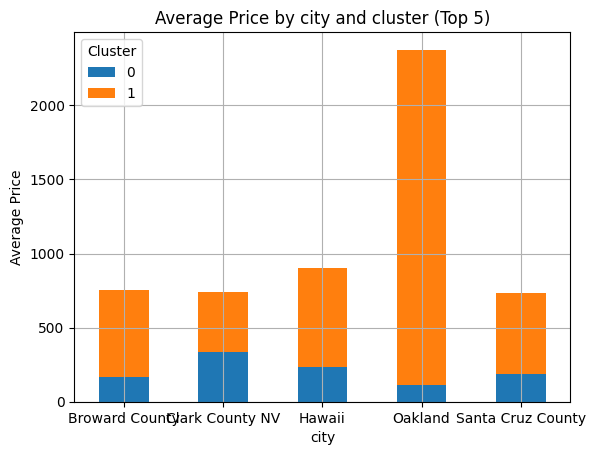

In [27]:
# Calculate the average price for each city
avg_price_by_city = df.groupby('city')['price'].mean()

# Filter data for the top 5 citys
top_5_avg_price = avg_price_by_city.sort_values(ascending=False).head(5)
filtered_data = df[df['city'].isin(top_5_avg_price.index)]

# Group by 'city' and 'cluster', then calculate the average price for each group
avg_price_by_city_cluster = filtered_data.groupby(['city', 'cluster'])['price'].mean().unstack()

# Plot stacked bar chart for top 5 citys
plt.figure(figsize=(12, 8))
avg_price_by_city_cluster.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Average Price by city and cluster (Top 5)')
plt.xlabel('city')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Cluster', loc='upper left')
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa di kota Oakland mempunyai harga yang paling tinggi dan di kota tersebut memang lebih banyak terdapat cluster 1 / cluster mewah dibandingkan cluster ekonomis

# Average lowest price by top 5 city

<Figure size 1200x800 with 0 Axes>

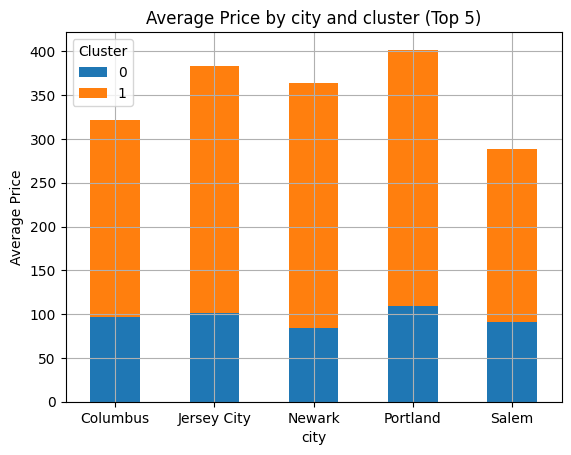

In [28]:
# Calculate the average price for each city
avg_price_by_city = df.groupby('city')['price'].mean()

# Filter data for the top 5 citys
top_5_avg_price = avg_price_by_city.sort_values(ascending=True).head(5)
filtered_data = df[df['city'].isin(top_5_avg_price.index)]

# Group by 'city' and 'cluster', then calculate the average price for each group
avg_price_by_city_cluster = filtered_data.groupby(['city', 'cluster'])['price'].mean().unstack()

# Plot stacked bar chart for top 5 citys
plt.figure(figsize=(12, 8))
avg_price_by_city_cluster.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Average Price by city and cluster (Top 5)')
plt.xlabel('city')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Cluster', loc='upper left')
plt.show()

Berdasarkan grafik diatas menunjukkan 5 kota dengan harga terendah memiliki proporsi yang hampir sama antara banyaknya cluster 1 yang lebih banyak dari cluster 0

# Bedrooms by cluster

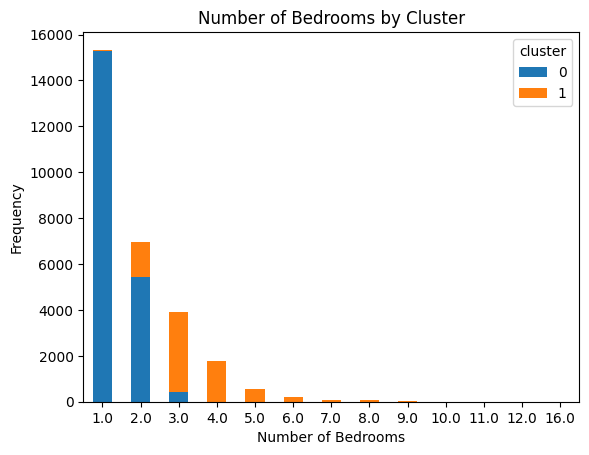

In [29]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['bedrooms', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Bedrooms by Cluster')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 0 mempunyai jumlah bedrooms yang lebih sedikit dibandingkan cluster 1

# Beds by cluster

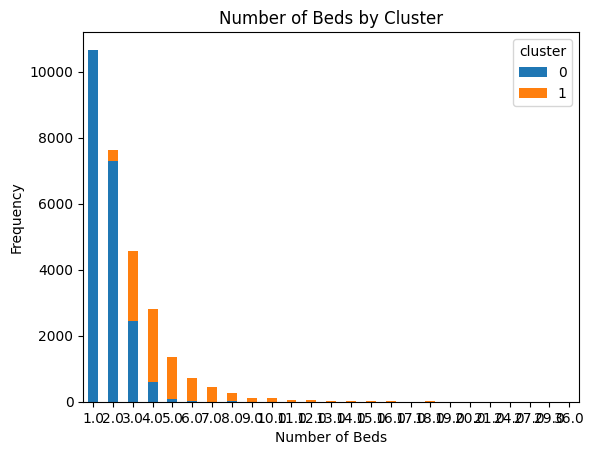

In [30]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['beds', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Beds by Cluster')
plt.xlabel('Number of Beds')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 0 mempunyai jumlah beds yang lebih sedikit dibandingkan cluster 1

# Bathrooms by cluster

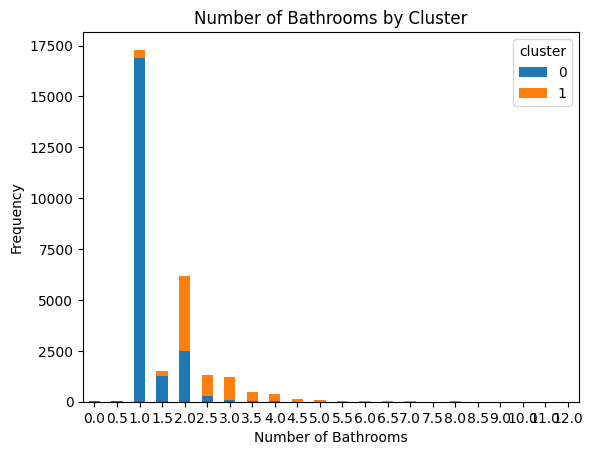

In [31]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['bathrooms', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Bathrooms by Cluster')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 0 mempunyai jumlah bathrooms yang lebih sedikit dibandingkan cluster 1

# room_type by cluster

In [32]:
df.columns

Index(['id', 'listing_url', 'picture_url', 'name', 'description',
       'property_type', 'room_type', 'accommodates', 'number_of_reviews',
       'bedrooms', 'beds', 'price', 'review_scores_rating', 'city', 'latitude',
       'longitude', 'bathrooms', 'cluster'],
      dtype='object')

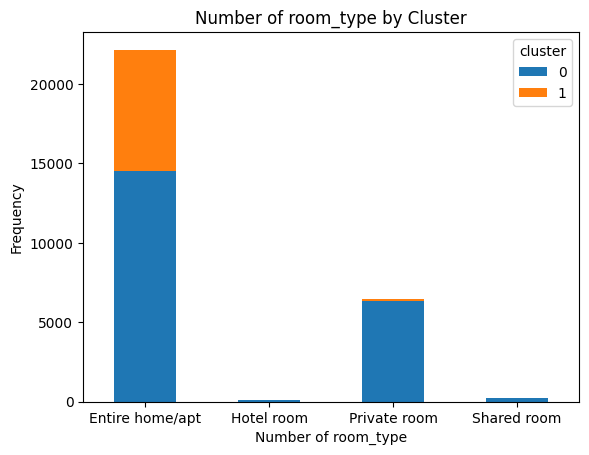

In [33]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['room_type', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of room_type by Cluster')
plt.xlabel('Number of room_type')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 1 mempunyai lebih banyak room_type jenis entire home/apt sedangkan cluster 0 mempunyai lebih banyak room_type jenis entire home/apt dan private room

# accommodates by cluster

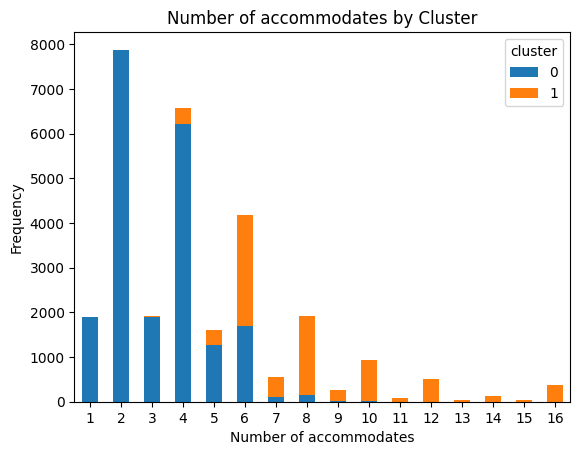

In [34]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['accommodates', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of accommodates by Cluster')
plt.xlabel('Number of accommodates')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa cluster 0 mempunyai jumlah accommodates yang lebih sedikit dibandingkan cluster 1

# review_scores_rating by cluster

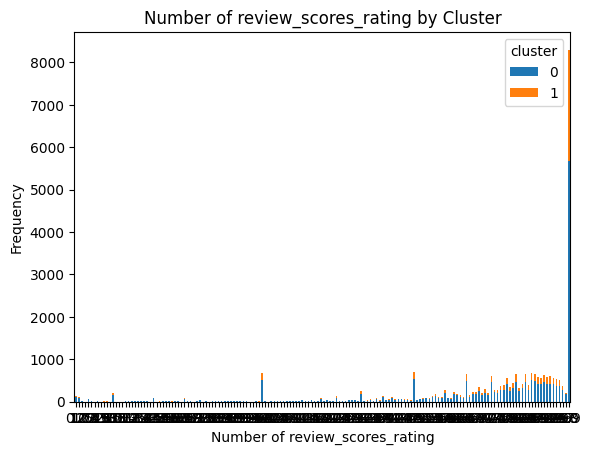

In [35]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = df.groupby(['review_scores_rating', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of review_scores_rating by Cluster')
plt.xlabel('Number of review_scores_rating')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()